In [5]:
import soundfile as sf
data, samplerate = sf.read('epiano.wav') 

left = data[:, 0]
right = data[:, 1]
print(data[:1000])

print(left[:1000])


[[ 0.00192261  0.00027466]
 [ 0.00238037  0.00057983]
 [ 0.00338745  0.00180054]
 ...
 [-0.03265381 -0.0244751 ]
 [-0.05593872 -0.04684448]
 [-0.07797241 -0.06762695]]
[ 0.00192261  0.00238037  0.00338745  0.0055542   0.00897217  0.01358032
  0.01947021  0.02648926  0.03421021  0.04293823  0.05239868  0.06253052
  0.07287598  0.08337402  0.09356689  0.10272217  0.11114502  0.11862183
  0.12521362  0.1312561   0.13690186  0.14215088  0.14715576  0.15203857
  0.15652466  0.16049194  0.16409302  0.16711426  0.16952515  0.17108154
  0.171875    0.17260742  0.17294312  0.17321777  0.17364502  0.17388916
  0.17379761  0.17340088  0.17355347  0.17520142  0.18005371  0.18847656
  0.20043945  0.2142334   0.2281189   0.23962402  0.24700928  0.2489624
  0.24520874  0.2366333   0.22363281  0.20663452  0.1864624   0.1633606
  0.13763428  0.10983276  0.08108521  0.05267334  0.02645874  0.00454712
 -0.0123291  -0.02407837 -0.03125    -0.03448486 -0.0355835  -0.03533936
 -0.03430176 -0.03271484 -0.030

In [15]:
import numpy as np
import numpy.typing as npt

def gaussian(x, mu, sigma):
    return (1 / (sigma * np.sqrt(2 * np.pi))) * np.power(np.e, -(1/2) * np.power(((x - mu)/sigma), 2))

def apply_gaussian_window(array: npt.NDArray):
    stdevs_from_mean = 3
    window = [gaussian(x, len(array) / 2, len(array) / (stdevs_from_mean * 2)) for x in range(len(array))]
    return window * array

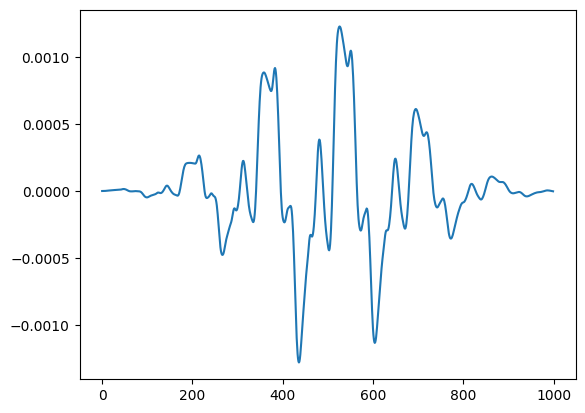

In [16]:
import matplotlib.pyplot as plt

# xs = [0.01 * x for x in range(-100, 100)]
# gaussian_y = [gaussian(x, 0, 1) for x in xs]

windowed_sample = apply_gaussian_window(left[:1000])

plt.figure()
plt.plot(windowed_sample)
plt.show()

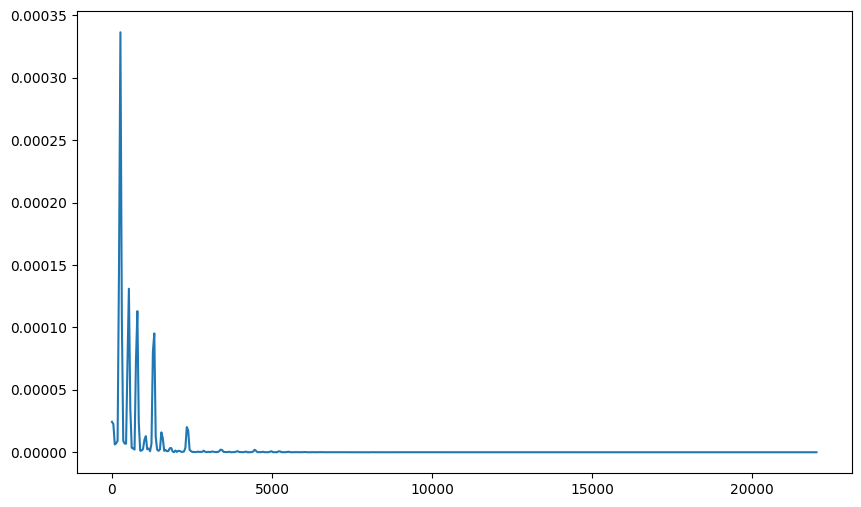

<uarray multimethod 'fft'>


In [14]:
from scipy.fft import fft, fftfreq


fft_sample = fft(windowed_sample)
n_samples = len(fft_sample)
xs = fftfreq(n_samples, 1 / (samplerate))[:n_samples // 2]
plt.figure(figsize=(10, 6))
plt.plot(xs, 2 / n_samples * np.abs(fft_sample[0:n_samples//2]))
plt.show()


amps = np.abs(fft_sample[0:n_samples//2])
print(fft)


[-0.33318199  0.42149418  0.35239311  0.303479   -0.02232092  0.44556019
  0.31241344 -0.25689545  0.49117797  0.15641237 -0.28839707  0.02457274
 -0.0119936   0.28694406 -0.13581512  0.087056    0.19805918 -0.06738207
  0.44437767 -0.27548226 -0.43531234  0.33744813  0.40671724  0.14683503
  0.22317861 -0.00954669  0.03554953  0.49191152  0.19255644 -0.23989908
  0.33441064 -0.16593651 -0.08150572  0.27437309 -0.44736195 -0.04003104
  0.22477932  0.01133213 -0.27718505 -0.03070681 -0.1090444   0.07447417
  0.40610143 -0.15537621  0.25522183  0.10187887  0.41951924  0.47409861
 -0.40235214  0.18614192  0.43256246  0.49050065  0.47029893  0.45440421
 -0.47269748 -0.10743138 -0.11305176  0.060981   -0.05707413  0.12080357
 -0.38809956  0.0265904   0.26658143  0.41377643  0.2798928  -0.31586937
 -0.0629665  -0.19000612  0.07901309 -0.16704536  0.08433462  0.22449621
  0.33515241  0.10776928 -0.17038874 -0.18760787 -0.01094761 -0.45018679
  0.32746309  0.03961509  0.4237834  -0.27274131  0

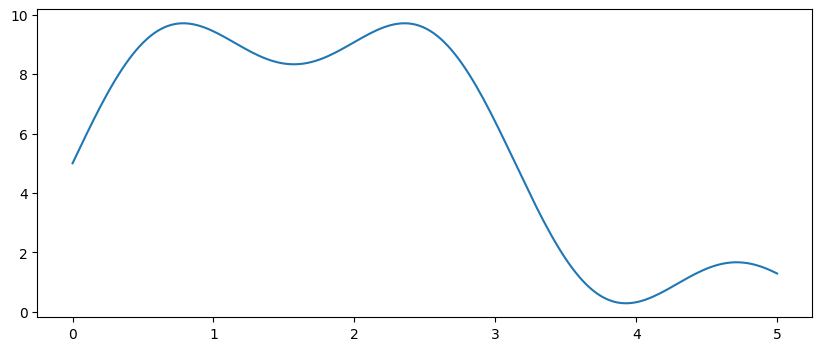

[(31, 9.713744826510357), (94, 9.71382147480417), (188, 1.666036288220622)]


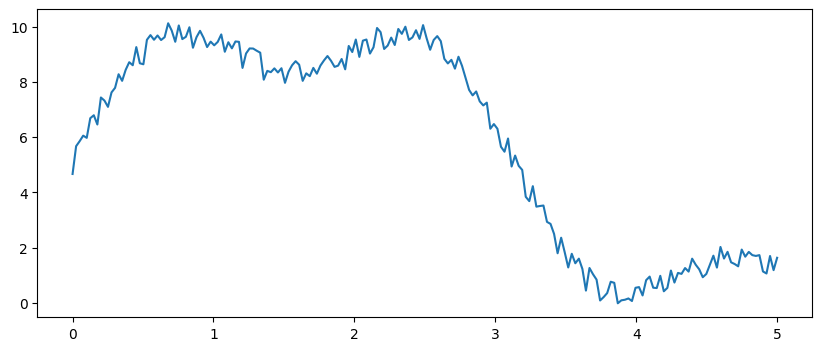

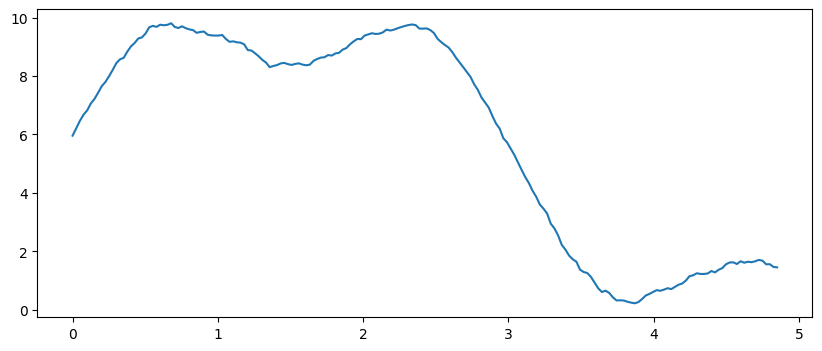

[(22, 9.73071117479337), (24, 9.723124179573214), (57, 8.413149113009762), (89, 9.696825265856793), (183, 1.6550648606638596)]
[(29, 9.704713513439234), (92, 9.704805670515984), (186, 1.6597431497751578)]


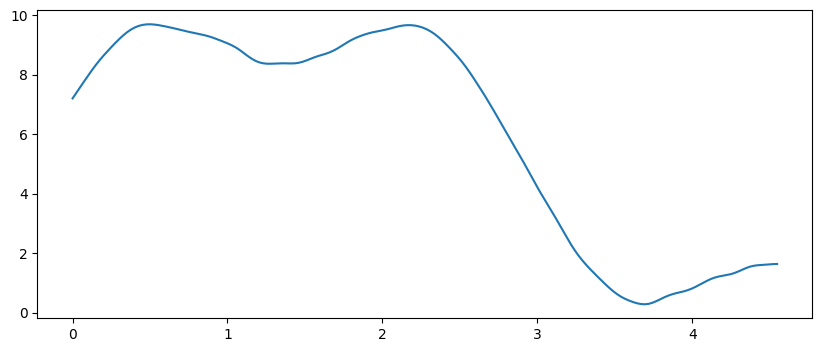

[(14, 9.645511341050424), (80, 9.61620442457184)]
[(31, 9.713744826510357), (94, 9.71382147480417), (188, 1.666036288220622)]


In [1]:
def DFT(x: ): 